In [21]:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn# ignore annoying warning (from sklearn and seaborn)

In [7]:
warnings.warn

In [9]:
from scipy import stats
from scipy.stats import norm, skew # for some statistics
# Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))# Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "./house-prices-advanced-regression-techniques"]).decode('utf8' )) # check the files available in the directory

data_description.txt
sample_submission.csv
test.csv
train.csv



In [3]:
color

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [6]:
warnings

<module 'warnings' from '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/warnings.py'>

In [10]:
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

In [11]:
test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [12]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [15]:
# check the number of samples and features

print('The train data size before dropping Id feature is : {}'.format(train.shape))

print('The train data size before dropping Id feature is : {}'.format(test.shape))

The train data size before dropping Id feature is : (1460, 81)
The train data size before dropping Id feature is : (1459, 80)


In [17]:
#Save the "Id" column
train_ID = train['Id']
test_ID= test['Id']

In [23]:
# Now the drop the "Id" column since it's unnecessary for the prediction process

train.drop("Id", axis=1, inplace=True)

test.drop("Id", axis=1, inplace=True)

In [24]:
#check the again the data size after dropping the "Id" variation

print('The train data size before dropping Id feature is : {}'.format(train.shape))
print('The train data size before dropping Id feature is : {}'.format(test.shape))

The train data size before dropping Id feature is : (1460, 80)
The train data size before dropping Id feature is : (1459, 79)


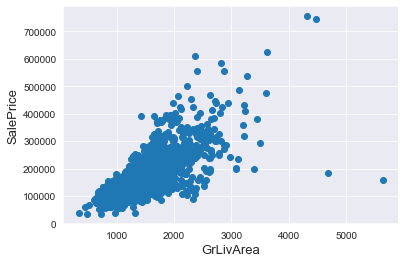

In [30]:
fig , ax = plt.subplots()
ax.scatter(x = train['GrLivArea'] , y =train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [32]:
# Deleting outliers

train = train.drop(train[(train.GrLivArea >4000) & (train.SalePrice < 300000)].index)

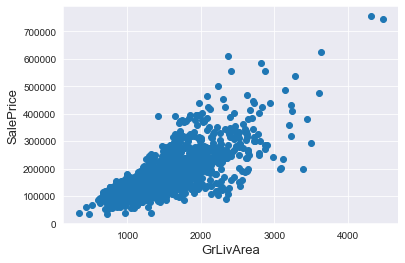

In [33]:
# check the graphic again



fig , ax = plt.subplots()
ax.scatter(x = train['GrLivArea'] , y =train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

 
 mu = 180932.92 and sigma = 79467.79



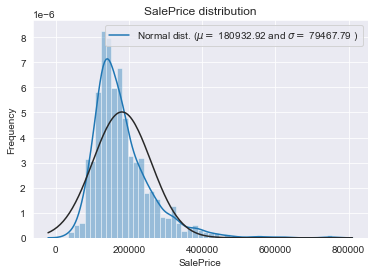

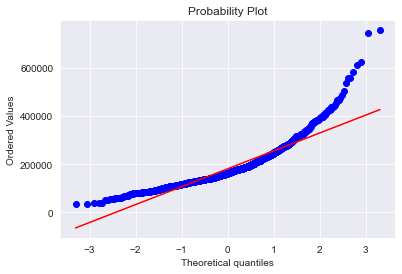

In [48]:
# Target Variable
# outliers removal is note always safe . We diceded to delete these two as they are very huge and really bad (extremly large aresas for very low prices)


#There are probably others outliers in the training data . However, removing all them may affect badly our models if ever there were also outliers in the test data.
# That's why , instead of removing them all, we will just manage to make some of outr models robust on them
# you cna refer to he modelling parkt of the notebook for that

# 테스트 데이터에도 이상치가 있는 경우 모든 이상치를 없애면나쁜 영향을 미칠 수 있으니
# robust 하게 만들어질 수 있도록

# histogram 과 kde plot 을 그려주는 건가 ? fit 을 넣으면 정규분포까지 보여준다

sns.distplot(train['SalePrice'], fit=norm)

# Get the fitted parameters use by the function

# mean value 와 sigma 값 리턴
(mu, sigma) = norm.fit(train['SalePrice'])
mu
sigma

print(" \n mu = {:.2f} and sigma = {:.2f}\n".format(mu,sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Get also the QQ-plot scipy stats plot option plt
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [50]:
# the target variable is right skewed . As (linear) models love normally distributed data, we need to tranform this variable
# and make it more normally distributed

# Log-transformation of the target variable

# We use the numpy function log1p which applies log(1+x) to all elements of the column
train['SalePrice'] = np.log1p(train['SalePrice'])

In [51]:
# Check the new distribution

 
 mu = 2.57 and sigma = 0.03



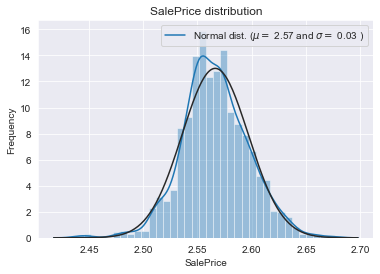

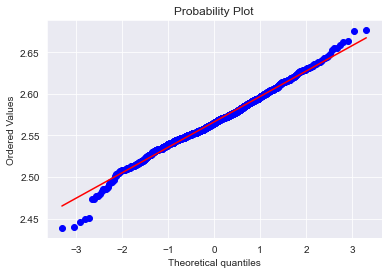

In [61]:
sns.distplot(train['SalePrice'], fit=norm)
# Get the fitted parameters used by the function
(mu , sigma) = norm.fit(train['SalePrice'])

print(' \n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))
# Now the plot the distiribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [62]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1 , inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2917, 79)


In [65]:
# Missing Data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na ==0].index).sort_values(ascending=False)[:30]

In [89]:
(all_data.isnull().sum() / len(all_data)) * 100

MSSubClass      0.000
MSZoning        0.000
LotFrontage     0.000
LotArea         0.000
Street          0.000
                 ... 
MoSold          0.000
YrSold          0.000
SaleType        0.000
SaleCondition   0.000
FireplacesQu    0.000
Length: 79, dtype: float64

In [ ]:
missing_data = pd.DataFrame({"Missing Ratio" : all_data_na})

missing_data.head(20 )

Text(0.5, 1.0, 'Percent missing data by feature')

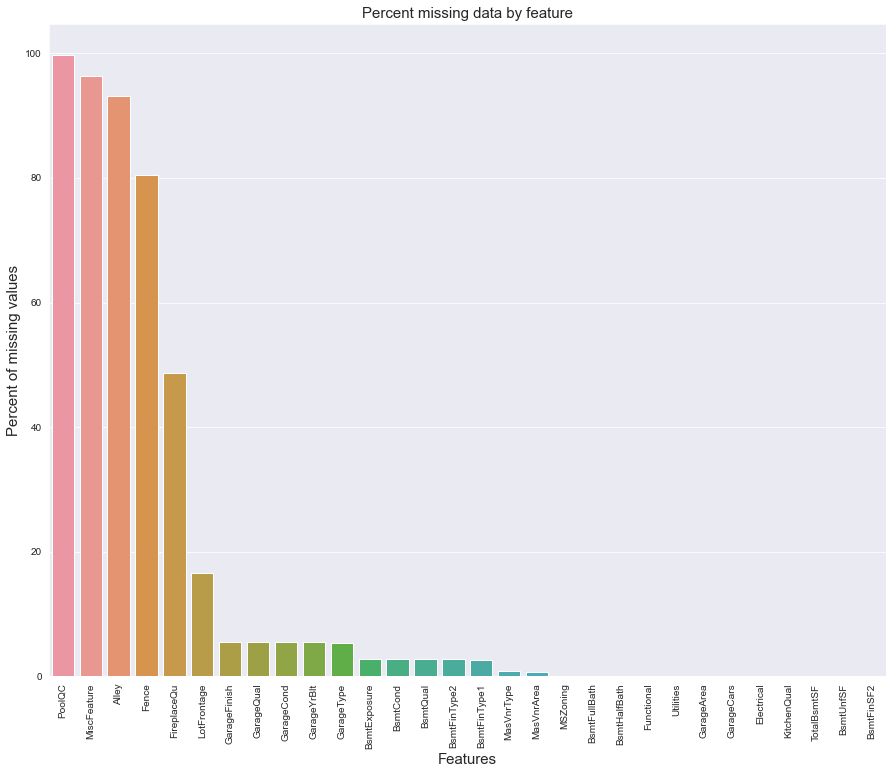

In [73]:
f,ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y= all_data_na)
plt.xlabel("Features", fontsize=15)
plt.ylabel('Percent of missing values' ,fontsize=15)
plt.title('Percent missing data by feature', fontsize=15 )

<AxesSubplot:>

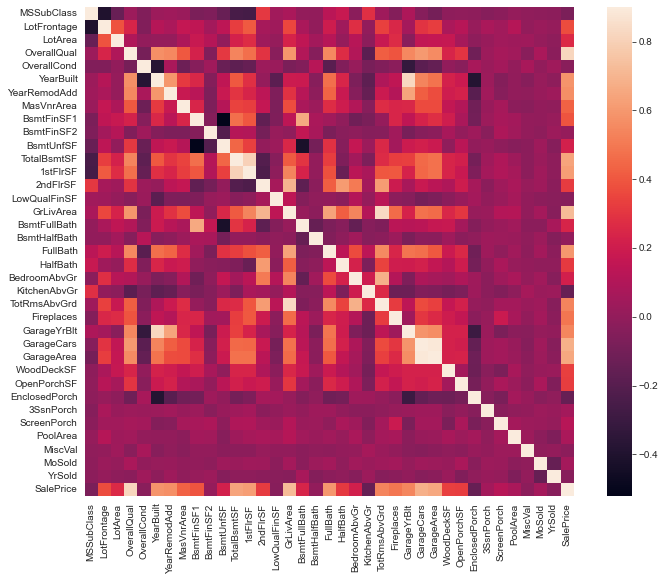

In [74]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9,square=True)


In [75]:
# Imputing missing values

# We impute them by proceeding sequentially through features with missing values

# PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value(+99%) and majority of houses have no Pool at all in general

In [76]:
all_data['PoolQC'] = all_data['PoolQC'].fillna("None")

In [78]:
#MiscFeature :data description says NA means "no misc feauture"
all_data['MiscFeature'] = all_data['MiscFeature'].fillna("None")

In [79]:
# Fence data desciption says NA means "no fence"
all_data['Fence'] = all_data['Fence'].fillna("None")

In [80]:
# FireplaceQu data desciption says NA mans no fireplace
all_data['FireplacesQu'] = all_data['FireplaceQu'].fillna('None')

In [81]:
# LotFrontage : since the area of each stret connected to the house property most likely
# have a similar area to other house in ints neighborhood, we can fill in missing values by the midian LotFrontage of the neighborhood

# Group by neighboorhood and fill in missing vlaue by the median LotFrontage of all the neighborhood
all_data['LotFrontage'] = all_data.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [82]:
# GarageType , GarageFinish , GarageQual and GarageCond " Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', "GarageCond"):
    all_data[col] = all_data[col].fillna("None")

In [83]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (since No garage = no cars in such garage)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [85]:
#Alley : data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")

In [86]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [87]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)
#Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
#Is there any remaining missing value ?

KeyError: "['Utilities'] not found in axis"

In [88]:
#Check remaining missing values if any
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [90]:
#More Features engineering
# Transforming some numerical variables that are really categorical


# MSSubClass = The building class

all_data['MSSubclass'] = all_data['MSSubClass'].apply(str)

In [92]:
# changing overallcond into a categorial variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


# Year and month sold are tranformed into categorical features

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] =all_data['MoSold'].astype(str)

In [94]:
from sklearn.preprocessing import LabelEncoder
cols = ()
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')

In [95]:
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

In [97]:

#%5
print('Shape all_data : {}'.format(all_data.shape))

Shape all_data : (2917, 80)


In [99]:
# Adding one more important feature

# Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second
# floor areas of each house

# Adding total sqfootage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] +all_data['2ndFlrSF']

In [101]:
all_data[c]

0        4
1        7
2       11
3        4
4        3
        ..
2912     8
2913     6
2914    11
2915     9
2916     2
Name: MoSold, Length: 2917, dtype: int64

In [103]:
all_data[c]

0        4
1        7
2       11
3        4
4        3
        ..
2912     8
2913     6
2914    11
2915     9
2916     2
Name: MoSold, Length: 2917, dtype: int64

In [104]:

train['MoSold']

0        2
1        5
2        9
3        2
4       12
        ..
1455     8
1456     2
1457     5
1458     4
1459     6
Name: MoSold, Length: 1458, dtype: int64

In [ ]:
#one-hot encoding 과  labelencoder 는 다르다 one-hot encoding 은 0 0 1 이런 식으로 0으로 자리 수를 주고 1로 값을 표현

In [106]:
# Skewed features

numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

In [107]:
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [108]:
# skewness 는 정규분포 곡선과의 왜곡도 그러니까 쉽게 말하면 왜곡되는 정도를 의미한다
# 의미상으로는 수치가 좌우로 치우쳐진정도
# 첨도는 상하로 치우쳐진정도
print('\nSkew in numerical feautres : \n')
skewness = pd.DataFrame({'Skew':skewed_feats})
skewness.head()


Skew in numerical feautres : 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372


In [109]:
skewness = skewness[abs(skewness) > 0.75]

In [115]:
skewness

,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [110]:
print('There are {} skewed numerical features to Box Cox tranform'.format(skewness.shape[0]))

There are 59 skewed numerical features to Box Cox tranform


0      1.541
1      1.541
2      1.541
3      1.541
4      1.541
        ... 
2912   1.541
2913   1.541
2914   1.541
2915   1.541
2916   1.541
Name: PoolQC, Length: 2917, dtype: float64

In [119]:
lam = 1.0
# lambda값은 어느 정도 줄 것인지를 정하는 듯 하다 1+x의 x값 ?
lam = 0.15
boxcox1p(all_data[feat], lam)

0      1.001
1      1.001
2      1.001
3      1.001
4      1.001
        ... 
2912   1.001
2913   1.001
2914   1.001
2915   1.001
2916   1.001
Name: PoolQC, Length: 2917, dtype: float64

In [ ]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam =0.15
for feat in skewed_features:
    # all_data[feat]+= 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [111]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 242)


In [114]:
skewed_features

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', '1stFlrSF', 'LotFrontage', 'GrLivArea', 'TotalSF',
       'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd', 'MSSubClass',
       'Fireplaces', 'HalfBath', 'TotalBsmtSF', 'BsmtFullBath', 'OverallCond',
       'HeatingQC', 'FireplaceQu', 'BedroomAbvGr', 'GarageArea', 'OverallQual',
       'FullBath', 'YrSold', 'BsmtFinType1', 'GarageCars', 'YearRemodAdd',
       'BsmtQual', 'YearBuilt', 'GarageFinish', 'LotShape', 'MoSold', 'Alley',
       'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence', 'ExterCond',
       'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual', 'CentralAir',
       'GarageCond', 'GarageYrBlt', 'Functional', 'Street', 'PoolQC'],
      dtype='object')

In [ ]:
# skewness 값을 로그적용하여 정규화 1+x 하는 과정
all_data[feat]

In [120]:
train = all_data[:ntrain]


In [121]:
test = all_data[ntrain:]

In [122]:
# Modelling

from sklearn.linear_model import ElasticNet ,Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

ImportError: cannot import name 'make' from 'sklearn.pipeline' (/Users/seongminpark/PycharmProjects/pythonProject/Kaggle/venv/lib/python3.8/site-packages/sklearn/pipeline.py)

In [ ]:
# define a cross validation strategy

# We use the cross_val_score function of Sklearn . However this function has not
# a shuffle attribute , we add then one line of code  ,in order to shuffle the dataset prior to cross-validation
